In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
catdata = pd.read_csv(r"D:\python\hierarchical_clustering_cats\publisheddata-scientificreports.csv")
catdata

,ID_number,Age,Gender,Neuter_status,Breed_group,Weaning_age,Outdoors,Other_cats,Activity_level,Contact_people,...,Aggression_owner,Aggression_cats,Shyness_novel,Shyness_strangers,Grooming,Wool_sucking,Behaviour_problem,Aggression_component,Shyness_component,Extraversion_component
0,1,4.0274,2,1,BEN,8,0,1,4,5,...,1,1,2,1,1.0,0.0,1.0,-0.392731,-0.364198,0.666318
1,2,2.1096,2,1,BEN,8,0,1,5,4,...,1,1,3,3,1.0,0.0,1.0,-0.633626,1.419777,0.994083
2,3,7.6822,1,1,BUR,4,0,1,4,5,...,1,1,2,1,4.0,3.0,2.0,-0.392731,-0.364198,0.666318
3,4,5.0027,1,1,BUR,4,4,0,5,5,...,1,2,1,1,1.0,0.0,1.0,0.090309,-0.780989,1.330449
4,5,5.0137,1,1,EUR,4,5,1,4,5,...,1,1,2,1,1.0,0.0,1.0,-0.392731,-0.364198,0.666318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5721,5722,11.1151,1,1,NFO,4,3,1,3,5,...,1,1,1,1,1.0,4.0,2.0,-0.310983,-1.112740,-0.172159
5722,5723,6.3644,1,0,NFO,4,5,1,4,3,...,1,1,2,2,1.0,0.0,1.0,-0.513650,0.159206,-0.516500
5723,5724,3.1205,1,1,NFO,4,4,1,4,5,...,1,1,2,1,3.0,0.0,1.0,-0.392731,-0.364198,0.666318
5724,5725,3.6274,1,1,NFO,5,1,1,5,3,...,1,1,4,3,2.0,4.0,1.0,-0.733206,1.983008,0.479449


In [3]:
# Group by 'Breed_group'
final_result_filtered = (
    catdata.groupby('Breed_group')
    .mean(numeric_only=True)
    .iloc[:, [17, 18, 19]]
)
final_result_filtered

final_result_filtered = final_result_filtered[final_result_filtered.index !="other"]
final_result_filtered = final_result_filtered[final_result_filtered.index != "HCS"]


In [4]:
scaler = StandardScaler()
finaldf_scaled = scaler.fit_transform(final_result_filtered)


In [5]:
# Perform hierarchical clustering using the linkage method (directly on the scaled data)
Z = linkage(finaldf_scaled, method='ward')
Z

array([[ 9.        , 12.        ,  0.46020945,  2.        ],
       [ 0.        ,  5.        ,  0.53347192,  2.        ],
       [ 6.        , 15.        ,  0.64510355,  2.        ],
       [ 8.        , 18.        ,  0.90243969,  3.        ],
       [11.        , 14.        ,  0.93850134,  2.        ],
       [ 3.        ,  4.        ,  1.05809505,  2.        ],
       [ 2.        , 21.        ,  1.09626246,  3.        ],
       [17.        , 19.        ,  1.19725394,  4.        ],
       [10.        , 20.        ,  1.41181145,  4.        ],
       [ 1.        , 13.        ,  1.67392762,  2.        ],
       [ 7.        , 22.        ,  2.14873618,  3.        ],
       [23.        , 24.        ,  2.50325539,  7.        ],
       [25.        , 27.        ,  2.62106358,  7.        ],
       [16.        , 26.        ,  4.13699414,  3.        ],
       [29.        , 30.        ,  4.83453362, 10.        ],
       [28.        , 31.        ,  5.7097715 , 17.        ]])

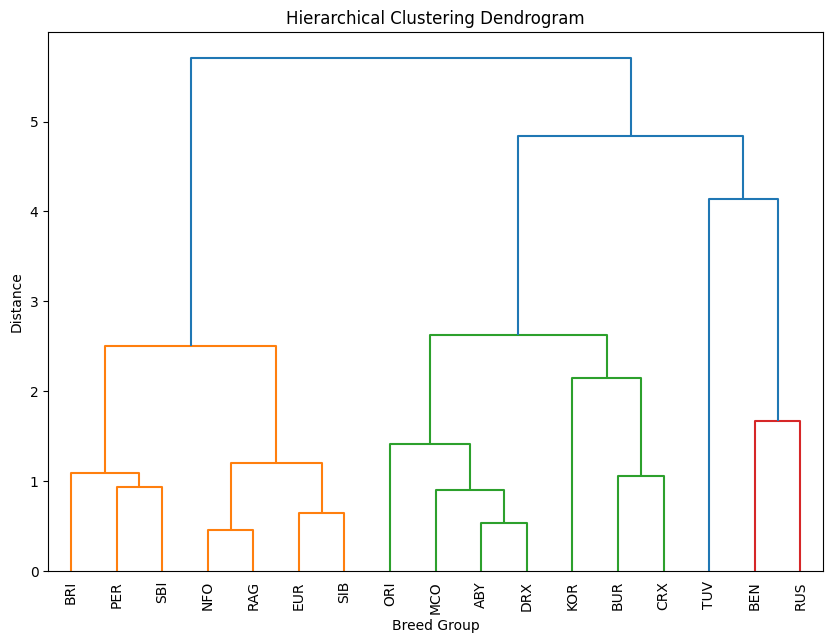

In [6]:
# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z, labels=final_result_filtered.index, leaf_rotation=90, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Breed Group')
plt.ylabel('Distance')
plt.show()

In [7]:
import numpy as np
from scipy.spatial.distance import pdist, squareform

def _ward(d_xi, d_yi, d_xy, size_x, size_y, size_i):
    """Calculate the Ward distance using the provided formula."""
    t = 1.0 / (size_x + size_y + size_i)
    return np.sqrt((size_i + size_x) * t * d_xi**2 +
            (size_i + size_y) * t * d_yi**2 -
            size_i * t * d_xy**2)

def ward_linkage_matrix(data):
    """Generate the Ward linkage matrix for the given data."""
    n = data.shape[0]
    sizes = np.ones(n)
    D = squareform(pdist(data, metric='euclidean'))
    np.fill_diagonal(D, np.inf)
    clusters = list(range(n))

    linkage_matrix = []

    for _ in range(n - 1):
        i, j = np.unravel_index(np.argmin(D), D.shape)
        link_dist = D[i, j]
        linkage_matrix.append([clusters[i], clusters[j], link_dist, sizes[i] + sizes[j]])
        
        for k in range(n):
            if k != i and k != j and not np.isinf(D[i, k]) and not np.isinf(D[j, k]):
                D[i, k] = D[k, i] = _ward(D[i, k], D[j, k], D[i, j], sizes[i], sizes[j], sizes[k])
        
        sizes[i] += sizes[j]
        D[:, j] = D[j, :] = np.inf
        clusters[i] = len(linkage_matrix) + n - 1
    
    return np.array(linkage_matrix)

# Example usage
data = np.random.rand(5, 2)
print(ward_linkage_matrix(data))


[[0.         4.         0.06898418 2.        ]
 [5.         2.         0.31901527 3.        ]
 [6.         1.         0.62157516 4.        ]
 [7.         3.         0.78127627 5.        ]]


In [8]:
# Example usage with a scaled dataset
# Assuming `finaldf_scaled` is already scaled using StandardScaler

# Perform custom hierarchical clustering with ward.D2
linkage_matrix = ward_linkage_matrix(finaldf_scaled)
[linkage_matrix, Z]

[array([[ 9.        , 12.        ,  0.46020945,  2.        ],
        [ 0.        ,  5.        ,  0.53347192,  2.        ],
        [ 6.        , 15.        ,  0.64510355,  2.        ],
        [18.        ,  8.        ,  0.90243969,  3.        ],
        [11.        , 14.        ,  0.93850134,  2.        ],
        [ 3.        ,  4.        ,  1.05809505,  2.        ],
        [ 2.        , 21.        ,  1.09626246,  3.        ],
        [19.        , 17.        ,  1.19725394,  4.        ],
        [20.        , 10.        ,  1.41181145,  4.        ],
        [ 1.        , 13.        ,  1.67392762,  2.        ],
        [22.        ,  7.        ,  2.14873618,  3.        ],
        [23.        , 24.        ,  2.50325539,  7.        ],
        [25.        , 27.        ,  2.62106358,  7.        ],
        [26.        , 16.        ,  4.13699414,  3.        ],
        [29.        , 30.        ,  4.83453362, 10.        ],
        [31.        , 28.        ,  5.7097715 , 17.        ]]),
 array

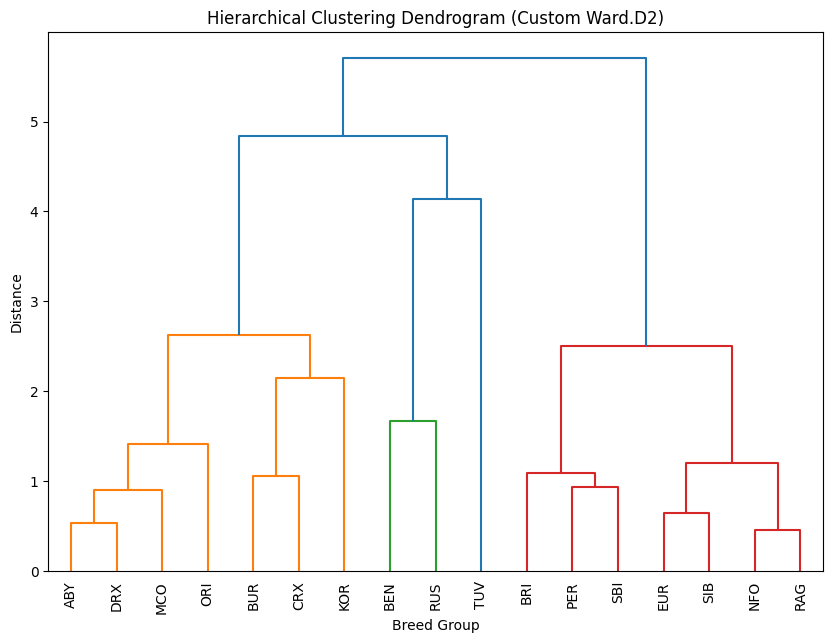

In [9]:
# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, labels=final_result_filtered.index, leaf_rotation=90, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram (Custom Ward.D2)')
plt.xlabel('Breed Group')
plt.ylabel('Distance')
plt.show()